# <div align ='center'> <font color='red'> BOLUM 9
## <div align ='center'> <font color='red'>Ödev
## <div align ='center'> <font color='red'> DBSCAN (density-based spatial clustering of applications with noise) 
    
Bu ödevde, UC Irvine Machine Learning Repository'den kalp hastalığı verisi ile çalışacaksınız.

Veri seti kümeleme algoritmasına geçmeden önce bazı işlemlere ihtiyaç duymaktadır.

##### Değişkenleri belirleme
  X = heartdisease_df.iloc[:, :13]
  y = heartdisease_df.iloc[:, 13]

##### "?" işareti olan değerleri 0 ile değiştirme 
  X = X.replace(to_replace='?', value=0)

##### Hedef değişkeni 1 ve 0 olarak değiştirme? 
  y = np.where(y > 0, 0, 1)
Burada, X sizin değişkenleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, hastanın kalp hastası olduğu ve y 0'a eşit olduğunda, hastanın kalp hastalığı olmadığı sonucuna varıyoruz.

Ödevi tamamlamak için aşağıdaki soruların cevabını içeren Jupyter notebook'u sisteme yükleyiniz:

Değişik eps ve min_samples değerleri deneyerek DBSCAN metodunu uygulayın. İki kümeli çözüm üretmenin pek kolay olmadığını göreceksiniz.

1) eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, min_samples değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

2) eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, eps değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [30]:
heart = pd.read_csv('data/heart.csv') 

In [31]:
X = heart.drop('target', axis=1) 
y = heart.target 

In [33]:
#Bu islem agac tabanli algoritmalarda gerekli degildir!!!!
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [28]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric ="euclidean")

clusters = dbscan_cluster.fit_predict(X_std)

In [39]:
pca = PCA(n_components=2).fit_transform(X_std)

In [36]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.0005630036745304687


In [37]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: -0.00815918945861596


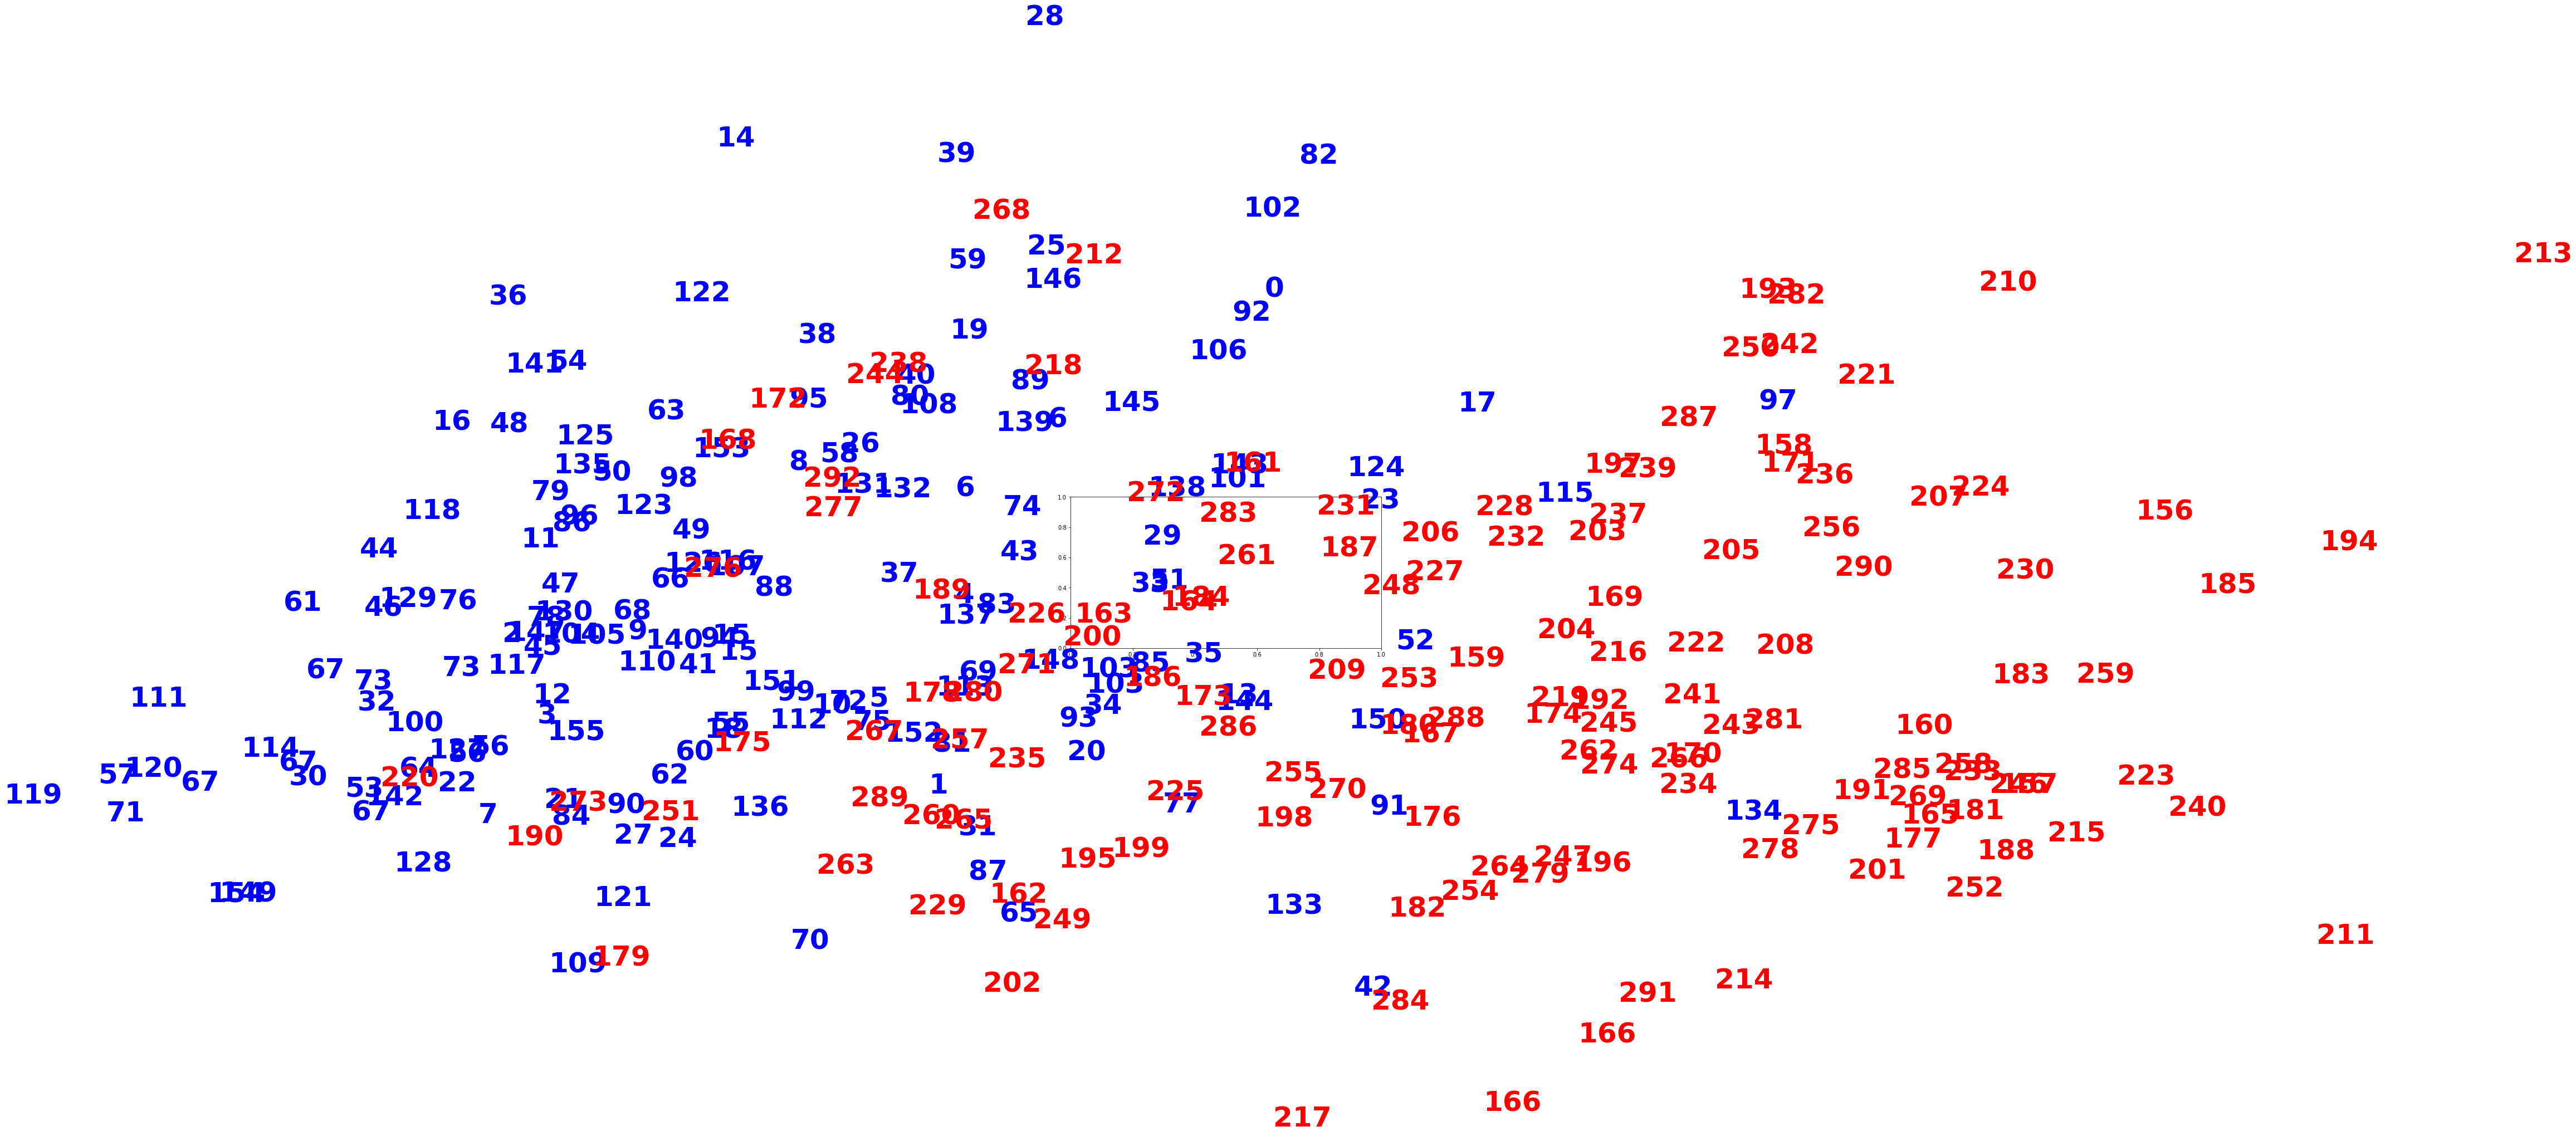

In [40]:
plt.figure(figsize=(10,5))
colors="rbgrg"

for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(clusters[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', "size":50})

In [41]:
dbscan_cluster = DBSCAN(eps=1, min_samples=2, metric ="euclidean")

clusters = dbscan_cluster.fit_predict(X_std)

In [42]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.010242186559729744


In [43]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: -0.24559730233594243


In [44]:
dbscan_cluster = DBSCAN(eps=1, min_samples=3, metric ="euclidean")

clusters = dbscan_cluster.fit_predict(X_std)

In [45]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.0037949483061452864


In [46]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: -0.11141073015881522


In [47]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5, metric ="euclidean")

clusters = dbscan_cluster.fit_predict(X_std)

In [48]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.0


In [49]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [50]:
dbscan_cluster = DBSCAN(eps=2, min_samples=1, metric ="euclidean")

clusters = dbscan_cluster.fit_predict(X)

In [51]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 4.330786969439154e-05


In [52]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: 0.006600660066006601


In [53]:
dbscan_cluster = DBSCAN(eps=3, min_samples=1, metric ="euclidean")

clusters = dbscan_cluster.fit_predict(X)

In [54]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 4.330786969439154e-05


In [55]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: 0.006600660066006601


In [56]:
dbscan_cluster = DBSCAN(eps=4, min_samples=1, metric ="euclidean")

clusters = dbscan_cluster.fit_predict(X)

In [57]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 4.330786969439154e-05


In [58]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: 0.006600660066006601


Daha duzenli bir sekilde tek kod ile bakarak:
* min_samples degeri artarak 

In [61]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")
clusters = dbscan_cluster.fit_predict(X_std)
print("number of clusters when min_samples=1 is:{}". format(len(np.unique(clusters))))

for i in range(2,25):
    dbscan_cluster=DBSCAN(eps=1, min_samples=i, metric="euclidean")
    clusters=dbscan_cluster.fit_predict(X_std)
    print("number of clusters when min_samples={} is:{}". format(i,len(np.unique(clusters))))


number of clusters when min_samples=1 is:293
number of clusters when min_samples=2 is:9
number of clusters when min_samples=3 is:2
number of clusters when min_samples=4 is:2
number of clusters when min_samples=5 is:1
number of clusters when min_samples=6 is:1
number of clusters when min_samples=7 is:1
number of clusters when min_samples=8 is:1
number of clusters when min_samples=9 is:1
number of clusters when min_samples=10 is:1
number of clusters when min_samples=11 is:1
number of clusters when min_samples=12 is:1
number of clusters when min_samples=13 is:1
number of clusters when min_samples=14 is:1
number of clusters when min_samples=15 is:1
number of clusters when min_samples=16 is:1
number of clusters when min_samples=17 is:1
number of clusters when min_samples=18 is:1
number of clusters when min_samples=19 is:1
number of clusters when min_samples=20 is:1
number of clusters when min_samples=21 is:1
number of clusters when min_samples=22 is:1
number of clusters when min_samples=23 

min_samples arttıkça küme sayısı azalıyor.

In [69]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")
clusters=dbscan_cluster.fit_predict(X_std)
print("number of clusters when eps=1 is:{}": format(len(np.unique(clusters))))

for i in range(1,25):
    dbscan_cluster= DBSCAN(eps=i, min_samples=1, metric="euclidean")
    clusters= dbscan_cluster.fit_predict(X_std)
    print("number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))


SyntaxError: invalid syntax (<ipython-input-69-6d8023971841>, line 3)

In [68]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 293
Number of clusters when eps=0.01 is: 302
Number of clusters when eps=0.1 is: 302
Number of clusters when eps=1 is: 293
Number of clusters when eps=2 is: 182
Number of clusters when eps=3 is: 41
Number of clusters when eps=4 is: 6
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1
